In [1]:
import pickle
import os
import time
import numpy as np
import ast


import cooltools
import cooltools.lib.plotting
#import functions

import shutil

import pandas as pd
import warnings
import h5py 
import glob

#from scorefunctions import *
import matplotlib.pyplot as plt
import sys

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/lib/numutils.py:11: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from ._numutils import (
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/api/expected.py:14: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from cooler.tools import partition


In [5]:
file = pd.read_csv('fripscore_new_equilibrated.csv')
file
file = file[file[' clife']!=500000]
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']

unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)


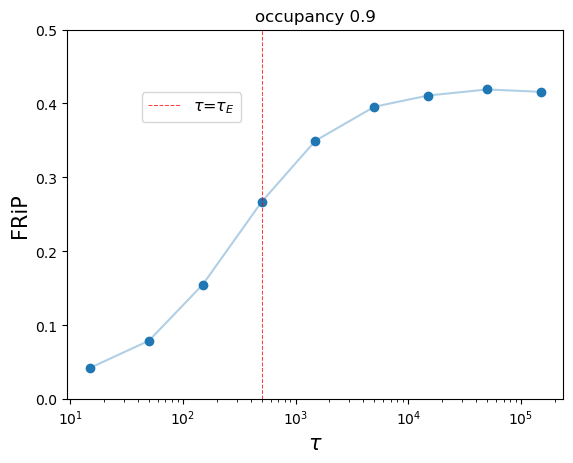

In [6]:
lifes, vels = [500] , [1]

for life in lifes:
    for vel in vels:
        new_file = file[(lifetime == life)&(velocity == vel)&(clife == 10*cof)][[' clife',' cof', ' fripscore']]
        new_file_filtered = new_file.drop_duplicates(keep = 'first')
        new_file_filtered = new_file_filtered.sort_values(' clife')
        new_clife = new_file_filtered[' clife']
        frip_score = new_file_filtered[' fripscore']
        plt.scatter(new_clife, frip_score)
        plt.plot(new_clife, frip_score, alpha = 0.35)
        plt.plot([life, life, life],[0,0.5,1],'--', color = 'red',alpha = 0.75, linewidth = 0.75, label = r'$\tau$=$\tau_E$')
        plt.ylim(0,0.5)
        plt.xlim()
plt.title('occupancy 0.9')
plt.xscale('log')
plt.legend(fontsize = 11.5,loc = (0.15,0.75))
plt.ylabel('FRiP',fontsize = 15)
plt.xlabel(r'$\tau$', fontsize = 15)
plt.savefig('frip_for_tau.png')
plt.show()
        

In [8]:
from polychrom.polymer_analyses import slope_contact_scaling
from scipy.ndimage import gaussian_filter1d

def smooth(x, sigma = 1.75):
        return gaussian_filter1d(x, sigma)

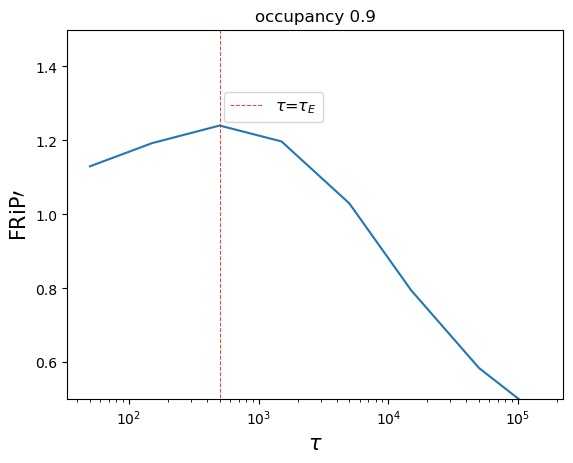

In [9]:
life, vel = 500 , 1

new_file = file[(lifetime == life)&(velocity == vel)&(clife == 10*cof)][[' clife',' cof', ' fripscore']]
new_file_filtered = new_file.drop_duplicates(keep = 'first')
new_file_filtered = new_file_filtered.sort_values(' clife')
new_clife = new_file_filtered[' clife']
frip_score = new_file_filtered[' fripscore']
s, der = slope_contact_scaling(np.log(new_clife), smooth(frip_score), sigma=1.5)
sp, derp = slope_contact_scaling(s, der, sigma=1.5)
plt.plot(np.exp(s), der)
plt.plot([life, life, life],[0,0.5,1.5],'--', color = 'red',alpha = 0.75, linewidth = 0.75, label = r'$\tau$=$\tau_E$')
plt.xscale('log')
plt.ylim(0.5,1.5)
plt.title('occupancy 0.9')
plt.legend(fontsize = 11.5,loc = (0.315,0.75))
plt.ylabel('FRiP$\prime$',fontsize = 15)
plt.xlabel(r'$\tau$', fontsize = 15)
plt.savefig('friprime_for_tau.png')

plt.show()

In [10]:
num_plot = 15
viridis_cmap = plt.get_cmap('cividis')

# Generate an array of values from 0 to 1 to map to colors in the colormap
values = np.linspace(0, 1, num_plot)

# Get the corresponding colors from the colormap
colors = viridis_cmap(values)

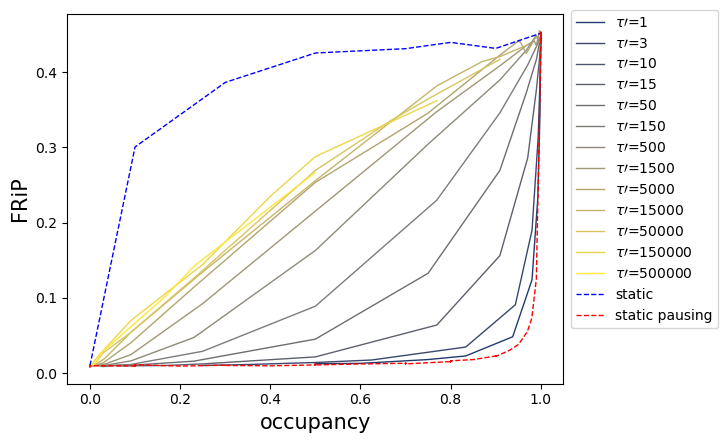

In [11]:
lifes, vels = [500] , [1]


i=1
file = pd.read_csv('fripscore_for_equilibrated.csv')
file = file[file[' separation']==100]
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']
unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
cof_val = 10
list_cof =[ 1, 3, 10, 15, 50, 150, 500,1500, 5000, 15000, 50000, 150000, 500000]
for cof_val in list_cof:
    for life in lifes:
        for vel in vels:
            i+=1
            new_file = file[(lifetime == life)&(velocity == vel)&(cof==cof_val)][[' clife',' cof', ' fripscore']]
            new_file_filtered = new_file.drop_duplicates(keep = 'first')
            new_file_filtered = new_file_filtered.sort_values(' clife')
            new_clife = new_file_filtered[' clife']
            frip_score = new_file_filtered[' fripscore']
            plt.plot(new_clife/(new_clife+cof_val), frip_score, label = r'$\tau\prime$=%s'%cof_val,linewidth=1, color = colors[i])


lifes, vels = [500] , [1]
file = pd.read_csv('fripscore_static.csv')
frip_score = file[' fripscore']
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']
face = file[' face']
cof_val = 1
clife_val = 10
for life in lifes:
    for vel in vels:
        new_file_stat = file[(lifetime == life)&(velocity == vel)&(cof==cof_val)&(clife==clife_val)][[' face', ' fripscore']]
        new_file_filtered = new_file_stat.drop_duplicates(keep = 'first')
        new_file_filtered = new_file_filtered.sort_values(' face')
        new_face = new_file_filtered[' face']
        frip_score = new_file_filtered[' fripscore']
        plt.plot(new_face, frip_score, color='blue',linestyle='--', linewidth =1, label ='static')

lifes, vels = [500] , [1]
file = pd.read_csv('fripscore_static_pause_with_number.csv')
file = file[(file['lifetime']==500)&(file[' velocity']==1)&(file[' separation']==100)]
seps = np.unique(file[' face'])
frip_score = file[' fripscore']
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']
face = file[' face']
cof_val = 1
clife_val = 10
for life in lifes:
    for vel in vels:
        new_file_stat = file[[' face', ' fripscore']]
        new_file_filtered = new_file_stat.drop_duplicates(keep = 'first')
        new_file_filtered = new_file_filtered.sort_values(' face')
        new_face = new_file_filtered[' face']
        frip_score = new_file_filtered[' fripscore']
        plt.plot(new_face, frip_score, color='red',linestyle='--', linewidth =1, label ='static pausing')
plt.legend(fontsize = 10,loc = (1.015,0.15))
plt.ylabel('FRiP',fontsize = 15)
plt.xlabel(r'occupancy', fontsize = 15)
plt.savefig('frip_for_occup.png',bbox_inches='tight')
plt.show()